In [1]:
# RF to predict tti or log tti or ahd from all other data
# use households until find pop
# dimensionality reduction?

# factorsd impacting congestion, networks, tti, modeshares

# tti website has other papers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [3]:
#cfc = pd.read_csv('../../data/tidy/msa-carbon-footprint.csv')
trf = pd.read_csv('../../data/tidy/tti-traffic.csv')
net = pd.read_csv('../../data/tidy/data-aggregation-networkstats.csv')
inc = pd.read_csv('../../data/tidy/data-aggregation-income.csv')
mod = pd.read_csv('../../data/tidy/data-aggregation-ms.csv')

In [4]:
trf.head()

,msa,auto_commuters,annual_excess_fuel_consumed_commuters,ahd,tti,dvmt_freeway,ahd_truck,vmt_arterial
0,"Akron, OH",298,6453,14470,1.11,5703.0,608,4460.0
1,"Albany-Schenectady, NY",300,5172,13605,1.14,7273.0,690,5623.0
2,"Albuquerque, NM",380,8950,18864,1.15,5500.0,909,7887.0
3,"Allentown, PA-NJ",329,5627,13837,1.14,5599.0,513,5199.0
4,"Anchorage, AK",137,2595,6193,1.17,1415.0,172,2240.0


In [5]:
net.head()

,msa,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,intersection_count,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,node_density_km,intersection_density_km,edge_density_km,street_density_km,builing_area_sqkm,area_sqkm
0,"Abilene, TX",14357,39401,5.488751,1.716897e+07,435.749497,2.881452,11912,8.925436e+06,20606,433.147439,1.067840,0.004465,2.012523,1.669790,2406.696840,1251.142264,7.048505,7133.829924
1,"Albany, GA",8466,22838,5.395228,9.545102e+06,417.948256,2.837468,6957,4.989593e+06,11954,417.399446,1.052833,0.002928,2.028965,1.667318,2287.583389,1195.808038,6.979580,4172.570196
2,"Akron, OH",26865,70900,5.278243,1.519199e+07,214.273426,2.756896,21200,8.039295e+06,36980,217.395754,1.056240,0.015089,11.231303,8.862967,6351.230011,3360.943838,14.307097,2391.975398
3,"Albany-Lebanon, OR",7132,17906,5.021312,8.280294e+06,462.431276,2.568144,5101,4.225439e+06,9147,461.948061,1.150205,0.005466,1.193324,0.853498,1385.456359,706.999160,7.519705,5976.582645
4,"Albany-Schenectady-Troy, NY",36977,96867,5.239311,2.787244e+07,287.739291,2.755794,30254,1.455542e+07,50900,285.961192,1.091565,0.033320,4.962653,4.060365,3740.737967,1953.471821,41.455466,7451.054339


In [6]:
df = inc.merge(mod, left_on='msa', right_on='msa', how='left')

In [7]:
df = df.merge(inc, left_on='msa', right_on='msa', how='left')

In [8]:
df = df.merge(trf, left_on='msa', right_on='msa', how='left')

In [9]:
df = df.dropna(subset=['tti'])
df['log_tti'] = np.log10(df['tti'])

In [10]:
df.head()

,msa,households_x,med_hh_inc_dol_x,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,households_y,med_hh_inc_dol_y,auto_commuters,annual_excess_fuel_consumed_commuters,ahd,tti,dvmt_freeway,ahd_truck,vmt_arterial,log_tti
0,"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,60343,44249,62.0,788.0,1694.0,1.06,NaN,93.0,NaN,0.025306
2,"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,281752,50776,298.0,6453.0,14470.0,1.11,5703.0,608.0,4460.0,0.045323
3,"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,58250,36805,53.0,810.0,1752.0,1.07,NaN,93.0,NaN,0.029384
6,"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,344168,48875,380.0,8950.0,18864.0,1.15,5500.0,909.0,7887.0,0.060698
7,"Alexandria, LA",54908,41032,0.838368,0.092655,0.015534,0.014780,0.002846,0.017077,0.018740,54908,41032,45.0,960.0,2048.0,1.11,NaN,184.0,NaN,0.045323


In [11]:
df = df.set_index('msa')

In [12]:
rf = RandomForestRegressor(max_features=15, n_estimators=1000, random_state=0, ccp_alpha=0.001)

In [13]:
rf

RandomForestRegressor(ccp_alpha=0.001, max_features=15, n_estimators=1000,
                      random_state=0)

In [14]:
X = df.drop(columns=['tti','log_tti','dvmt_freeway', 'vmt_arterial'])

In [15]:
Y = (df['log_tti'])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 1)

In [18]:
df

,households_x,med_hh_inc_dol_x,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,households_y,med_hh_inc_dol_y,auto_commuters,annual_excess_fuel_consumed_commuters,ahd,tti,dvmt_freeway,ahd_truck,vmt_arterial,log_tti
msa,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,60343,44249,62.0,788.0,1694.0,1.06,NaN,93.0,NaN,0.025306
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,281752,50776,298.0,6453.0,14470.0,1.11,5703.0,608.0,4460.0,0.045323
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,58250,36805,53.0,810.0,1752.0,1.07,NaN,93.0,NaN,0.029384
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,344168,48875,380.0,8950.0,18864.0,1.15,5500.0,909.0,7887.0,0.060698
"Alexandria, LA",54908,41032,0.838368,0.092655,0.015534,0.014780,0.002846,0.017077,0.018740,54908,41032,45.0,960.0,2048.0,1.11,NaN,184.0,NaN,0.045323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Williamsport, PA",46008,45877,0.819512,0.088274,0.015044,0.008621,0.004282,0.038993,0.025275,46008,45877,33.0,457.0,1075.0,1.05,NaN,43.0,NaN,0.021189
"Wilmington, NC",107330,48581,0.789613,0.103864,0.008271,0.014511,0.008100,0.018264,0.057377,107330,48581,129.0,2697.0,6346.0,1.12,NaN,180.0,NaN,0.049218
"Winston-Salem, NC",256301,44589,0.844997,0.085579,0.006790,0.011309,0.001219,0.012930,0.037176,256301,44589,214.0,2546.0,6956.0,1.11,5931.0,292.0,2359.0,0.045323


In [19]:
df.isna().sum()

households_x                               0
med_hh_inc_dol_x                           0
ms_cara                                    0
ms_carp                                    0
ms_pt                                      0
ms_taxi                                    0
ms_bike                                    0
ms_walk                                    0
ms_wfh                                     0
households_y                               0
med_hh_inc_dol_y                           0
auto_commuters                             0
annual_excess_fuel_consumed_commuters      0
ahd                                        0
tti                                        0
dvmt_freeway                             140
ahd_truck                                  0
vmt_arterial                             140
log_tti                                    0
dtype: int64

In [20]:
from pathlib import Path  
filepath = Path('../../data/tidy/congestion-exploration.csv', index = False)  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

In [21]:
rf.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.001, max_features=15, n_estimators=1000,
                      random_state=0)

In [22]:
y_pred = rf.predict(X_test)

In [29]:
y_pred

array([0.04166027, 0.04166027, 0.04166027, 0.04166027, 0.04166027,
       0.04166027, 0.04166027, 0.04166027, 0.04166027, 0.04166027,
       0.04166027, 0.04166027, 0.04166027, 0.04166027, 0.04166027,
       0.04166027, 0.04166027, 0.04166027, 0.04166027, 0.04166027,
       0.04166027, 0.04166027, 0.04166027, 0.04166027, 0.04166027,
       0.04166027, 0.04166027, 0.04166027, 0.04166027, 0.04166027,
       0.04166027, 0.04166027, 0.04166027, 0.04166027])

In [23]:
mean_squared_error(y_test, y_pred)

0.00026812604487784795

In [24]:
mean_absolute_percentage_error(y_test, y_pred)

0.4214688887046879

In [25]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.016374554799378455

(0.0, 0.1)

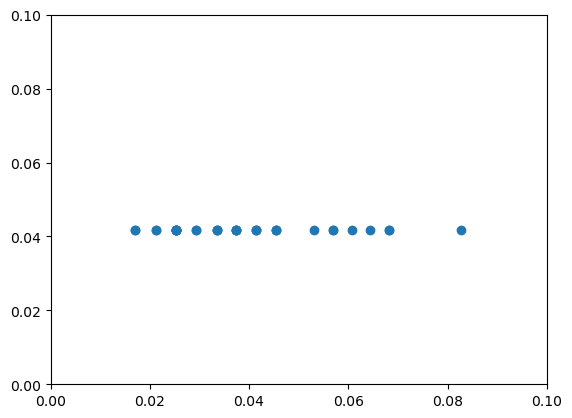

In [26]:
plt.scatter(y_test, y_pred)
plt.ylim(0, .1)
plt.xlim(0, .1)

In [27]:
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
tree_importances = pd.Series(result.importances_mean, index=X.columns)

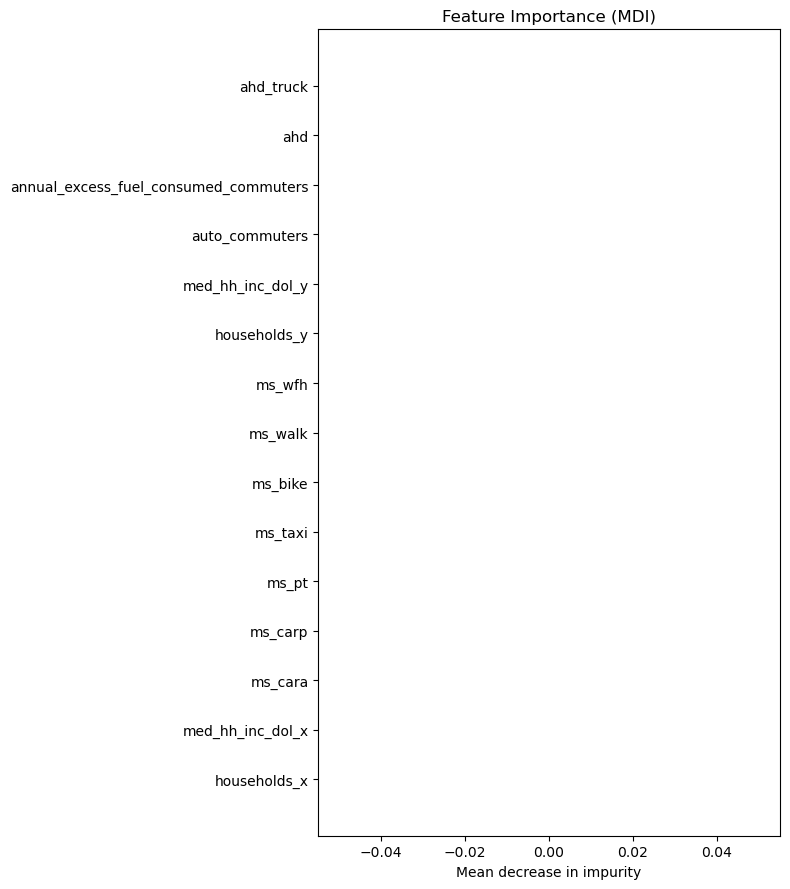

In [28]:
# sort features according to importance
sorted_idx = np.argsort(tree_importances)
pos = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(8,9))
# plot feature importances
plt.barh(pos, tree_importances[sorted_idx], align="center")

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");
plt.tight_layout()
plt.savefig('../../figures/log-tti-rf.png',dpi=300)